
Model Regression: MSE = 0.01, R^2 = 1.00


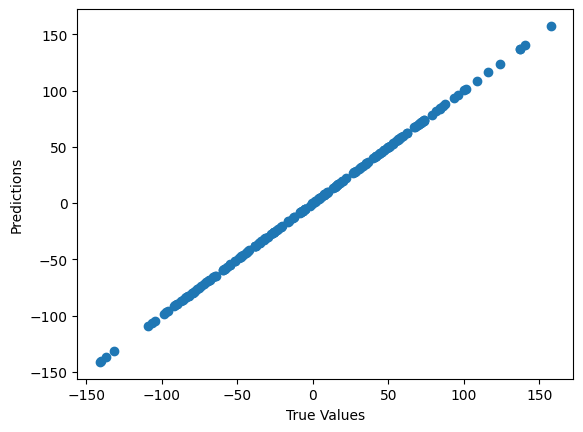

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

data = pd.DataFrame(X, columns=[f"Feature{i+1}" for i in range(5)])
data['Target'] = y

data.to_csv('regression_data.csv', index=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
def evaluate_model(model, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2
mse_model, r2_model = evaluate_model(model, y_test, y_pred)
print(f"\nModel Regression: MSE = {mse_model:.2f}, R^2 = {r2_model:.2f}")

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()



Частина 2: Аналіз часових даних

Знайдіть набір часових даних в Інтернеті. Це може бути, наприклад, набір даних про ціни на акції, погоду, рух транспорту, або будь-які інші дані, які залежать від часу.

Завантажте та візуалізуйте ці дані. Переконайтеся, що ви розумієте основні характеристики часового ряду, такі як тренд, сезонність, аномалії тощо.

Використовуйте методи аналізу часових рядів, такі як розкладання на компоненти, автокореляція тощо, для отримання інсайтів і підготовки даних для моделювання.

C:\Users\User\AppData\Local\Temp\ipykernel_8492\1902872414.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=[['Дата', 'Час']], dayfirst=True, index_col='Дата_Час')


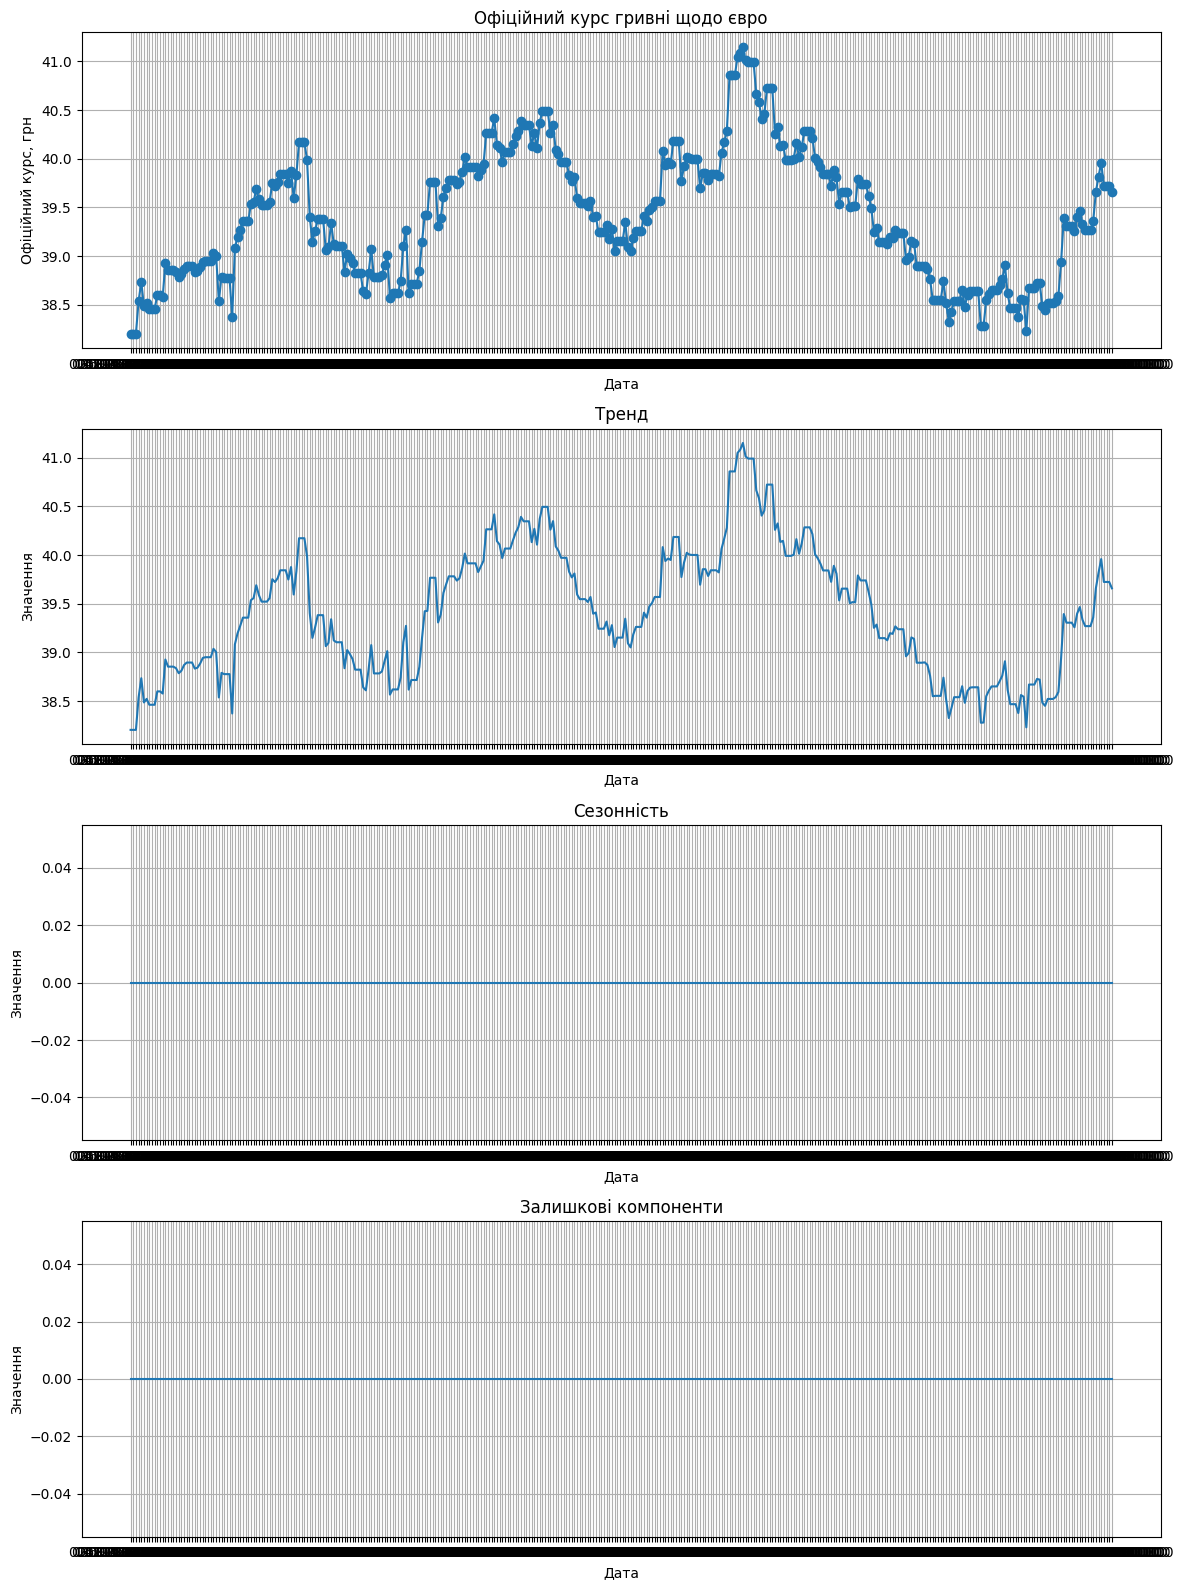

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Зчитування даних
file_path = r'C:\Users\User\M_L\M_l\Lab 2\Офіційний курс гривні щодо іноземних валют.csv'
df = pd.read_csv(file_path, parse_dates=[['Дата', 'Час']], dayfirst=True, index_col='Дата_Час')

# Розкладання на компоненти (тренд, сезонність, залишкові компоненти)
result = seasonal_decompose(df['Офіційний курс гривні, грн'], model='additive', period=1)

# Створення 4 окремих графіків
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))

# Графік часового ряду
axes[0].plot(df.index, df['Офіційний курс гривні, грн'], marker='o')
axes[0].set_title('Офіційний курс гривні щодо євро')
axes[0].set_xlabel('Дата')
axes[0].set_ylabel('Офіційний курс, грн')
axes[0].grid(True)

# Розкладання на компоненти - тренд
axes[1].plot(df.index, result.trend)
axes[1].set_title('Тренд')
axes[1].set_xlabel('Дата')
axes[1].set_ylabel('Значення')
axes[1].grid(True)

# Розкладання на компоненти - сезонність
axes[2].plot(df.index, result.seasonal)
axes[2].set_title('Сезонність')
axes[2].set_xlabel('Дата')
axes[2].set_ylabel('Значення')
axes[2].grid(True)

# Розкладання на компоненти - залишкові компоненти
axes[3].plot(df.index, result.resid)
axes[3].set_title('Залишкові компоненти')
axes[3].set_xlabel('Дата')
axes[3].set_ylabel('Значення')
axes[3].grid(True)

# Відображення графіків
plt.tight_layout()
plt.show()


Частина 3: Підготовка та аналіз даних на основі файлу AmesHousing.csv (виконується тільки для отримання високої оцінки).

Завантажте файл даних "AmesHousing.csv", який містить інформацію про нерухомість в місті Еймс, штат Айова, США.

Вивчіть структуру даних та характеристики ознак. Визначте цільову змінну для регресії (наприклад, ціну житла).

Виконайте підготовку даних, таку як обробка відсутніх значень, перетворення категоріальних ознак у числові, масштабування тощо.

Побудуйте модель регресії на підготовлених даних і оцініть її точність.

R^2 = 0.84


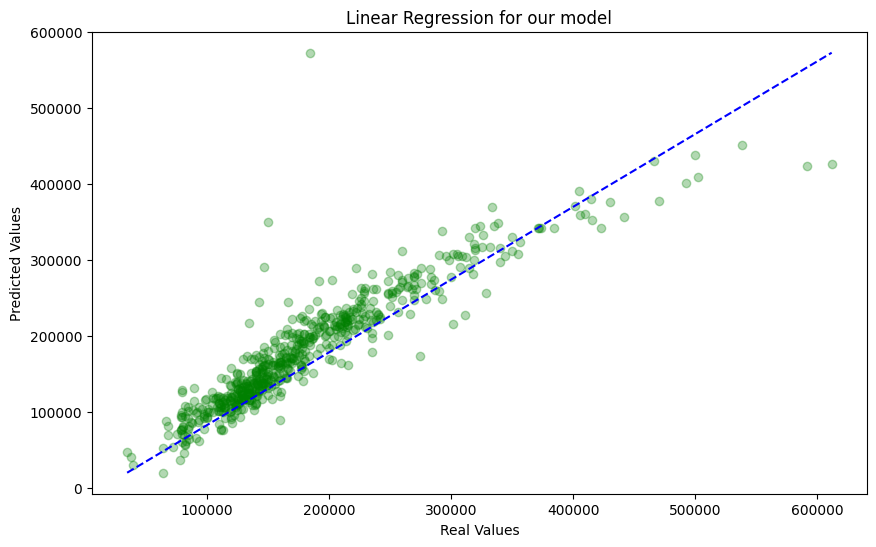

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

data = pd.read_csv('AmesHousing.csv')

X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

#Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

#Handling missing values filling them with the mean one
X.fillna(X.mean(), inplace=True)   

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print(f"R^2 = {r2:.2f}")


plt.figure(figsize=(10, 6))
plt.title("Linear Regression for our model")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.scatter(y_test, y_pred, c='green', alpha=0.3)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], ls='--', c ='blue')

plt.show()